In [2]:
import csv
import pandas as pd

In [6]:
import pandas as pd

# Read the extracted_lines.csv file, skipping the first row
df = pd.read_csv('extracted_lines.csv', skiprows=[0], header=None)

# Extract row and column indices from the first column
df[['row', 'col']] = df[0].str.split('-', expand=True).astype(int)

# Add x and y coordinates
df['x'] = 7.8254 * (df['col'] / 7)
df['y'] = 7.8254 * (df['row'] / 7)

# Reorder columns
df = df[[0, 'x', 'y', 1]]

# Save the updated DataFrame to a new CSV file
df.to_csv('coordinates_with_energy.csv', index=False)


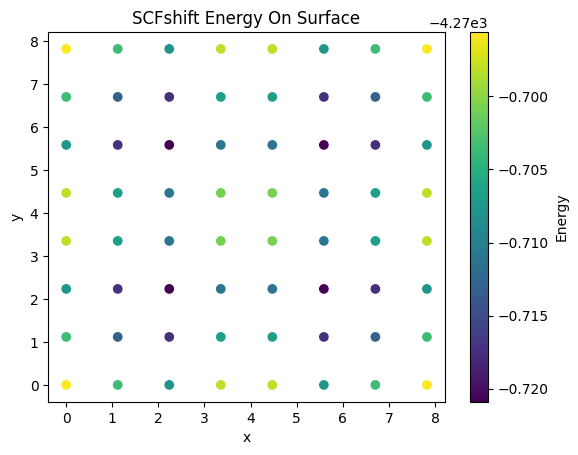

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('coordinates_with_energy.csv')

df

# Extract x, y, and energy values
x = df['x']
y = df['y']
energy = df['energy'].str.replace(' Ry', '').astype(float)

# Create a scatter plot with colormap
plt.scatter(x, y, c=energy, cmap='viridis')
plt.colorbar(label='Energy')

# Set plot title and axis labels
plt.title('SCFshift Energy On Surface')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()


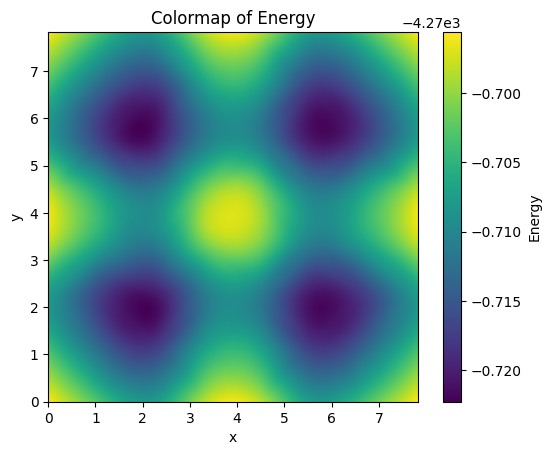

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Read the CSV file
df = pd.read_csv('coordinates_with_energy.csv')

# Extract x, y, and energy values
x = df['x']
y = df['y']
energy = df['energy'].str.replace(' Ry', '').astype(float)

# Define the grid size for interpolation
grid_size = 1000

# Create a meshgrid for interpolation
xi = np.linspace(x.min(), x.max(), grid_size)
yi = np.linspace(y.min(), y.max(), grid_size)
xi, yi = np.meshgrid(xi, yi)

# Perform interpolation to get energy values on the grid
zi = griddata((x, y), energy, (xi, yi), method='cubic')

# Create a colormap plot with interpolation
plt.imshow(zi, cmap='viridis', extent=(x.min(), x.max(), y.min(), y.max()), origin='lower')
plt.colorbar(label='Energy')

# Set plot title and axis labels
plt.title('Colormap of Energy')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()
